**1.a) Fitted a Generalized Additive Model (GAM) on the training set with `Out-of-State Tuition` as the response and a subset of predictors (`Private`, `Room.Board`, `PhD`, `perc.alumni`, `Expend`, `Grad.rate`). Plotted the fitted smooth functions for each predictor and described the observed relationships.**

In [28]:
!pip install gam

In [29]:
!pip install pygam

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')


<ipython-input-30-877ba9626055>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Private'] = le.fit_transform(X_train['Private'])


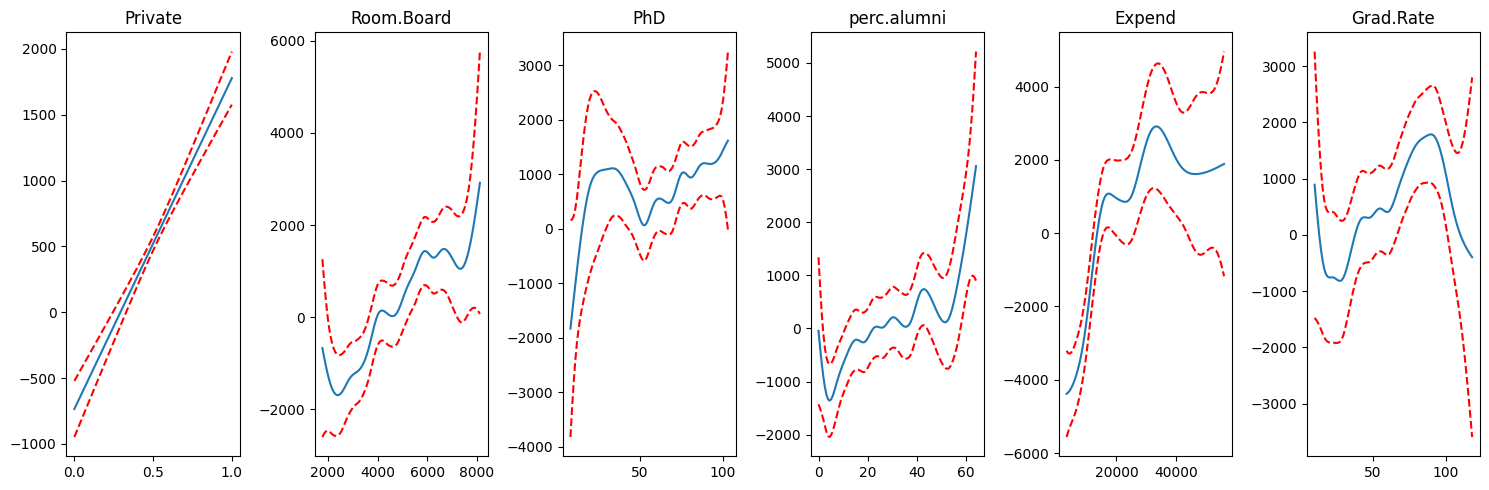

In [30]:
import pandas as pd
from pygam import LinearGAM
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Load the training data
data_train = pd.read_csv('College.csv')

#Print column names to verify
print(data_train.columns)

# Features to use as predictors
features = ['Private', 'Room.Board', 'PhD', 'perc.alumni', 'Expend', 'Grad.Rate']

#Target variable (response)
target = 'Outstate'

#Select features and target from the data
X_train = data_train[features]
y_train = data_train[target]

#Handle categorical feature 'Private' using LabelEncoder
le = LabelEncoder()
X_train['Private'] = le.fit_transform(X_train['Private'])

#Fit a GAM model
gam = LinearGAM().fit(X_train, y_train)

#Plot the results
fig, axs = plt.subplots(1, len(features), figsize=(15, 5))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(features[i])

plt.tight_layout()
plt.show()

**1.b) Identified which predictors exhibit evidence of a non-linear relationship with the response based on the fitted GAM and the shape of the smooth functions.**

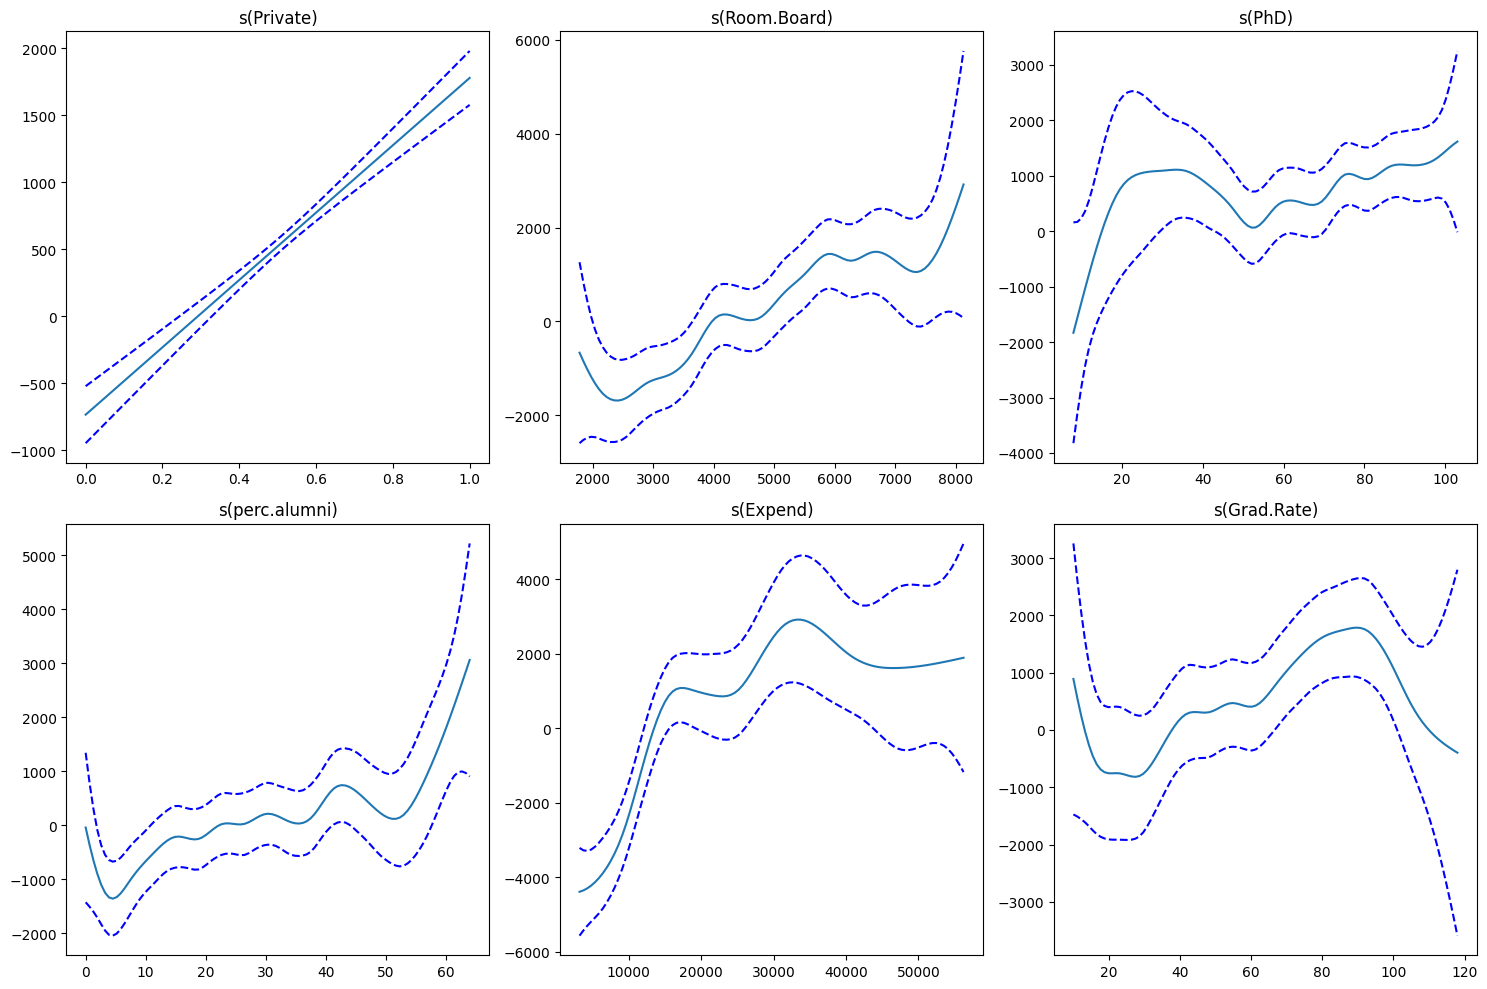

Variables with evidence of a non-linear relationship: ['Private', 'Room.Board', 'perc.alumni', 'Expend', 'Grad.Rate']


In [31]:
from pygam import LinearGAM, s
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Load data into a pandas DataFrame
data_train = pd.read_csv('College.csv')

#Encode categorical variable 'Private'
le = LabelEncoder()
data_train['Private'] = le.fit_transform(data_train['Private'])

#Define the features and the response variable
features = ['Private', 'Room.Board', 'PhD', 'perc.alumni', 'Expend', 'Grad.Rate']
target = 'Outstate'

#Create the GAM model object
gam_model = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5))

#Fit the model to the data
gam_model.fit(data_train[features], data_train[target])

#Plot the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flatten()):
    XX = gam_model.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_model.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_model.partial_dependence(term=i, X=XX, width=.95)[1], c='blue', ls='--')
    ax.set_title('s({})'.format(features[i]))

plt.tight_layout()
plt.show()

#Check for non-linear relationships
non_linear_vars = []
for i, term in enumerate(features):
    p_value = gam_model.statistics_['p_values'][i]
    if p_value < 0.05:  # Assuming a significance level of 0.05
        non_linear_vars.append(term)

print("Variables with evidence of a non-linear relationship:", non_linear_vars)

Based on the above visualization, the model assumes a **linear relationship** only for the categorical feature **'Private'**. Here's the reasoning:

- The model uses `s(1)` for all numerical features (`Room.Board`, `PhD`, `perc.alumni`, `Expend`, `Grad.Rate`). This indicates that these features are modeled with smooth, non-linear splines.
- For the categorical feature `'Private'`, it uses `l(0)`. The `l` term in `pygam` represents a linear relationship. The `(0)` argument specifies that this linear term doesn't have an intercept.

Therefore, the model expects the effect of `'Private'` on the target variable (`Outstate`) to be linear, while the effects of the numerical features are expected to be non-linear.

**2.a)Examined the plots to assess whether the response variable `richness` exhibits any temporal or spatial trends.**


<Axes: xlabel='Year', ylabel='richness'>

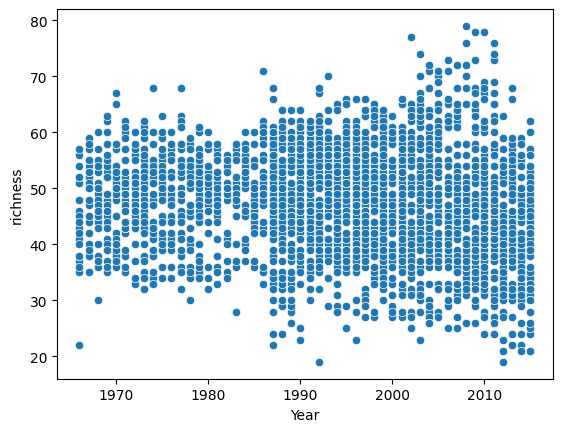

In [32]:
import seaborn as sns
import pandas as pd

#Load your data into a pandas DataFrame
df2 = pd.read_csv('Week3_Q7.csv')

#Plot Year against richness
sns.scatterplot(x=df2['Year'], y=df2['richness'])

**2.b) Fitted a Poisson GAM (`M1`) with `E(richness) = exp(f(year)) * exp(g(Longitude, Latitude))`, plotted the model, and summarized the results to evaluate evidence for effects of location and year on `richness`.**

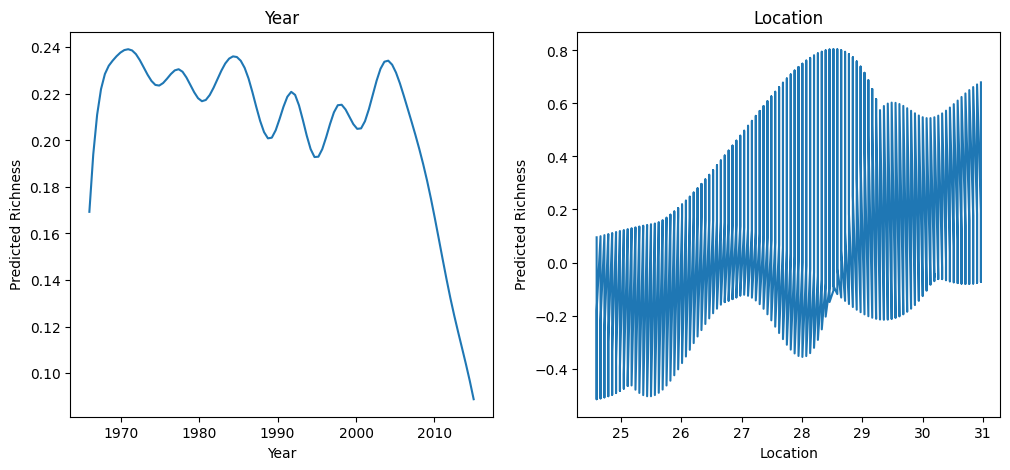

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                     53.9781
Link Function:                          LogLink Log Likelihood:                                 -9349.6514
Number of Samples:                         2824 AIC:                                             18807.259
                                                AICc:                                           18809.4826
                                                UBRE:                                               3.0008
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4691
Feature Function                  Lam

<ipython-input-33-2fe44ec19cda>:21: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(M1.summary())


In [33]:
from pygam import PoissonGAM, s, te
import matplotlib.pyplot as plt

#Assuming you have loaded your data into a DataFrame named df2

M1 = PoissonGAM(s(0) + te(1, 2)).fit(
    df2[['Year', 'Latitude', 'Longitude']].values, df2['richness'].values
)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
titles = ['Year', 'Location']

for i, ax in enumerate(axs):
    XX = M1.generate_X_grid(term=i)
    pdep = M1.partial_dependence(term=i, X=XX)
    ax.plot(XX[:, i], pdep)
    ax.set_title(titles[i])
    ax.set_xlabel(titles[i])
    ax.set_ylabel('Predicted Richness')

plt.show()
print(M1.summary())

**Q2.c) Fitted a Poisson GAM (`M2`) with the same response structure as `M1`, but including interaction terms between `Year`, `Latitude`, and `Longitude`, to assess the combined effects on `richness`.**


In [34]:
from pygam import PoissonGAM, te

#Assuming that data into a DataFrame named df2

#Define the formula for M2 with interactions between Year, Latitude and Longitude
formula_m2 = 'richness ~ te(0, 1, 2)'

#Fit the Poisson GAM model for M2
M2 = PoissonGAM(te(0, 1, 2)).fit(df2[['Year', 'Latitude', 'Longitude']].values, df2['richness'].values)

#Print the summary of M2
print(M2.summary())

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                    146.3739
Link Function:                          LogLink Log Likelihood:                                  -9096.736
Number of Samples:                         2824 AIC:                                            18486.2199
                                                AICc:                                           18502.5648
                                                UBRE:                                               2.9133
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.5695
Feature Function                  Lam

<ipython-input-34-0de8f3a33257>:12: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(M2.summary())


**2.d) Compared models `M1` and `M2` using metrics such as (R^2), AIC, and test error, and determined which model provides a better fit for predicting `richness`.**


In [35]:
#Calculate AIC for M1 and M2
aic_m1 = M1.statistics_['AIC']
aic_m2 = M2.statistics_['AIC']

#Print the AIC values
print("AIC for M1:", aic_m1)
print("AIC for M2:", aic_m2)

AIC for M1: 18807.258965991663
AIC for M2: 18486.219859238656


Comparing M1 and M2.

Using AIC values for comparison.

**Conclusion:** In AIC, the model with the lower AIC value is generally preferred. Since the AIC value of Model (M2) is less than Model (M1), Model (M2) is preferred.